# Часть 1


Эпоха 0, Ошибка: 0.249971
Эпоха 1, Ошибка: 0.490067
Эпоха 2, Ошибка: 0.490067
Эпоха 3, Ошибка: 0.490067
Эпоха 4, Ошибка: 0.490067
Эпоха 5, Ошибка: 0.490067
Эпоха 6, Ошибка: 0.490067
Эпоха 7, Ошибка: 0.490067
Эпоха 8, Ошибка: 0.490067
Эпоха 9, Ошибка: 0.490067
Эпоха 10, Ошибка: 0.490067
Эпоха 11, Ошибка: 0.490067
Эпоха 12, Ошибка: 0.490067
Эпоха 13, Ошибка: 0.490067
Эпоха 14, Ошибка: 0.490067
Эпоха 15, Ошибка: 0.490067
Эпоха 16, Ошибка: 0.490067
Эпоха 17, Ошибка: 0.490067
Эпоха 18, Ошибка: 0.490067
Эпоха 19, Ошибка: 0.490067


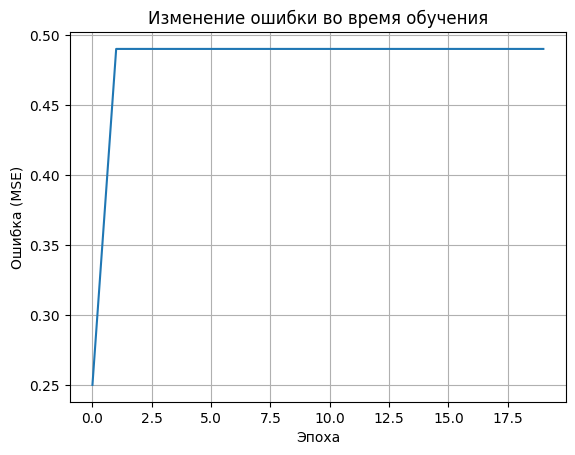

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784) / 255.0  # Преобразуем в векторы 784 и нормализуем
x_test = x_test.reshape(-1, 784) / 255.0

y_train = (y_train >= 5).astype(int)
y_test = (y_test >= 5).astype(int)

y_train_onehot = np.zeros((y_train.size, 2))
y_train_onehot[np.arange(y_train.size), y_train] = 1
y_test_onehot = np.zeros((y_test.size, 2))
y_test_onehot[np.arange(y_test.size), y_test] = 1

input_size = 784    # Размер входного слоя
hidden_size = 128   # Размер скрытого слоя
output_size = 2     # Размер выходного слоя
learning_rate = 0.01  # Скорость обучения
epochs = 20        # Количество эпох

np.random.seed(0)  # Для воспроизводимости
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Веса входного слоя
b1 = np.zeros((1, hidden_size))                       # Смещения скрытого слоя
W2 = np.random.randn(hidden_size, output_size) * 0.01 # Веса скрытого слоя
b2 = np.zeros((1, output_size))                       # Смещения выходного слоя

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

losses = []

for epoch in range(epochs):
    z1 = np.dot(x_train, W1) + b1   # Линейная комбинация для скрытого слоя
    a1 = sigmoid(z1)                # Активация скрытого слоя
    z2 = np.dot(a1, W2) + b2        # Линейная комбинация для выходного слоя
    a2 = sigmoid(z2)                # Активация выходного слоя (предсказание)

    loss = mse_loss(y_train_onehot, a2)
    losses.append(loss)

    error_output = a2 - y_train_onehot      # Ошибка на выходе
    d_a2 = error_output * sigmoid_derivative(a2)  # Градиент для выходного слоя

    error_hidden = np.dot(d_a2, W2.T)       # Ошибка на скрытом слое
    d_a1 = error_hidden * sigmoid_derivative(a1)  # Градиент для скрытого слоя

    W2 -= learning_rate * np.dot(a1.T, d_a2)  # Обновление весов W2
    b2 -= learning_rate * np.sum(d_a2, axis=0, keepdims=True)  # Обновление b2
    W1 -= learning_rate * np.dot(x_train.T, d_a1)  # Обновление весов W1
    b1 -= learning_rate * np.sum(d_a1, axis=0, keepdims=True)  # Обновление b1

    if epoch % 1 == 0:
        print(f'Эпоха {epoch}, Ошибка: {loss:.6f}')

plt.plot(losses)
plt.xlabel('Эпоха')
plt.ylabel('Ошибка (MSE)')
plt.title('Изменение ошибки во время обучения')
plt.grid(True)
plt.show()

# Часть 2


100%|██████████| 9.91M/9.91M [00:00<00:00, 52.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.67MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.3MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.23MB/s]


Training with SGD, batch size: 16
Epoch 1: Train Loss: 0.5370, Test Loss: 0.3141, Accuracy: 90.15%
Epoch 2: Train Loss: 0.2592, Test Loss: 0.2304, Accuracy: 92.93%
Epoch 3: Train Loss: 0.1901, Test Loss: 0.1704, Accuracy: 94.87%
Epoch 4: Train Loss: 0.1500, Test Loss: 0.1454, Accuracy: 95.43%
Epoch 5: Train Loss: 0.1238, Test Loss: 0.1198, Accuracy: 96.39%


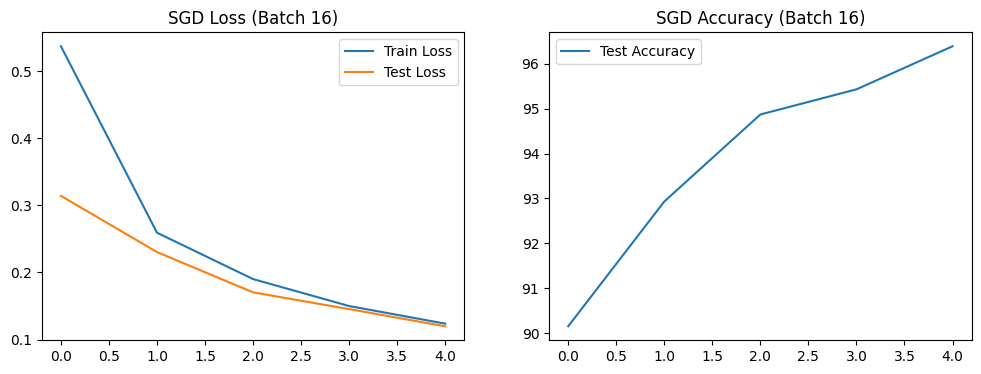

Training with Adam, batch size: 16
Epoch 1: Train Loss: 0.4958, Test Loss: 0.4292, Accuracy: 88.54%
Epoch 2: Train Loss: 0.3971, Test Loss: 0.3582, Accuracy: 90.48%
Epoch 3: Train Loss: 0.3671, Test Loss: 0.4045, Accuracy: 89.27%
Epoch 4: Train Loss: 0.3596, Test Loss: 0.3308, Accuracy: 91.77%
Epoch 5: Train Loss: 0.3472, Test Loss: 0.3815, Accuracy: 89.73%


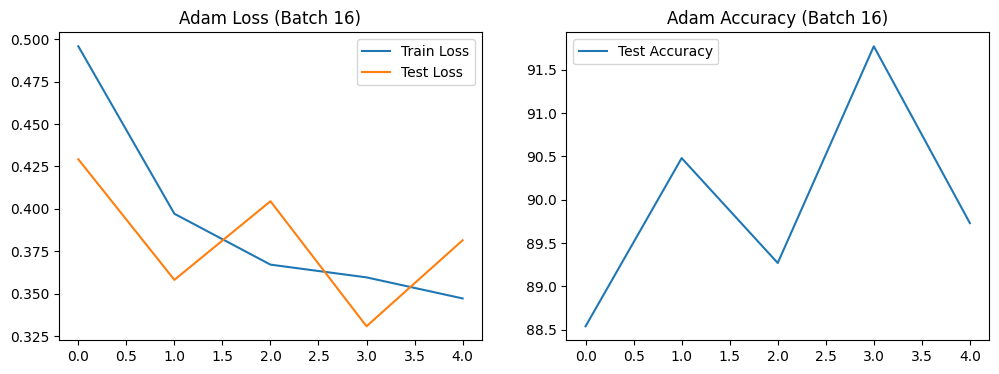

Training with RMSprop, batch size: 16
Epoch 1: Train Loss: 0.7786, Test Loss: 0.5220, Accuracy: 87.53%
Epoch 2: Train Loss: 0.4618, Test Loss: 0.4506, Accuracy: 89.04%
Epoch 3: Train Loss: 0.4564, Test Loss: 0.4172, Accuracy: 90.08%
Epoch 4: Train Loss: 0.4766, Test Loss: 0.3905, Accuracy: 89.86%
Epoch 5: Train Loss: 0.4775, Test Loss: 0.4221, Accuracy: 89.13%


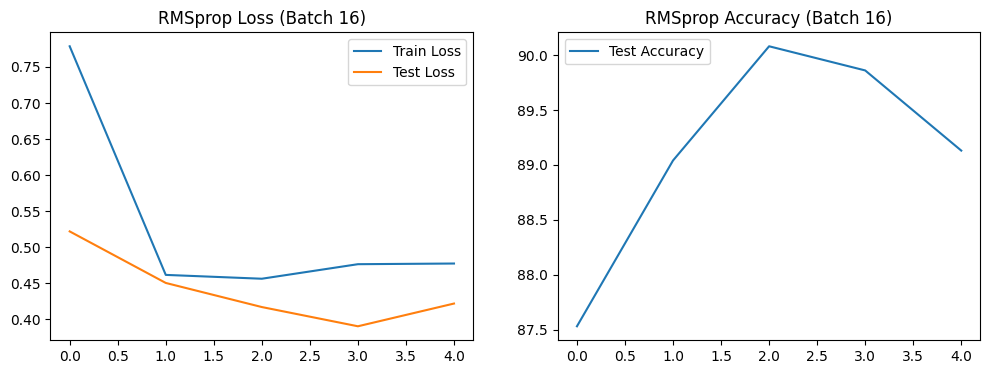

Training with Momentum, batch size: 16
Epoch 1: Train Loss: 0.3391, Test Loss: 0.2296, Accuracy: 93.05%
Epoch 2: Train Loss: 0.1725, Test Loss: 0.1867, Accuracy: 94.50%
Epoch 3: Train Loss: 0.1349, Test Loss: 0.1522, Accuracy: 95.67%
Epoch 4: Train Loss: 0.1138, Test Loss: 0.1542, Accuracy: 95.87%
Epoch 5: Train Loss: 0.1023, Test Loss: 0.1378, Accuracy: 96.09%


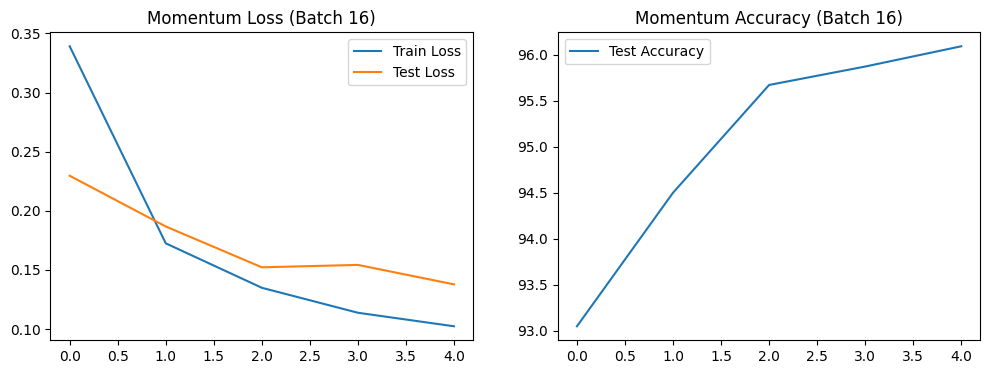

Training with SGD, batch size: 32
Epoch 1: Train Loss: 0.7003, Test Loss: 0.3579, Accuracy: 89.28%
Epoch 2: Train Loss: 0.3196, Test Loss: 0.2741, Accuracy: 92.28%
Epoch 3: Train Loss: 0.2689, Test Loss: 0.2421, Accuracy: 92.65%
Epoch 4: Train Loss: 0.2272, Test Loss: 0.2066, Accuracy: 93.86%
Epoch 5: Train Loss: 0.1923, Test Loss: 0.1853, Accuracy: 94.37%


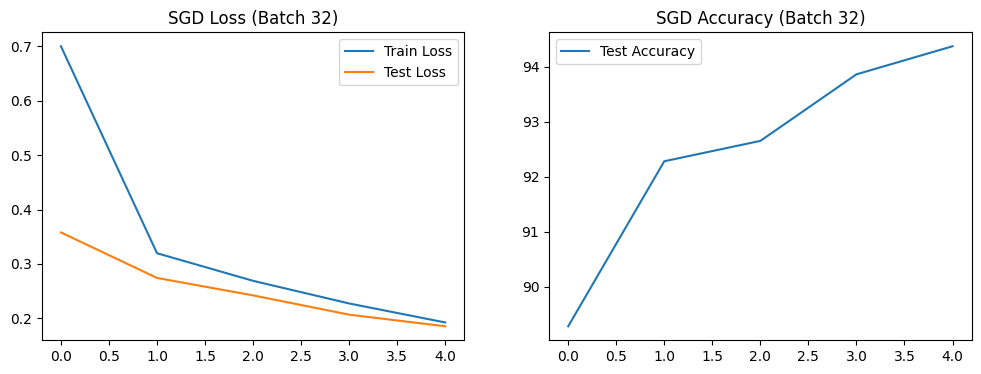

Training with Adam, batch size: 32
Epoch 1: Train Loss: 0.4184, Test Loss: 0.3429, Accuracy: 89.51%
Epoch 2: Train Loss: 0.3140, Test Loss: 0.2916, Accuracy: 92.09%
Epoch 3: Train Loss: 0.2921, Test Loss: 0.2764, Accuracy: 92.70%
Epoch 4: Train Loss: 0.2793, Test Loss: 0.2745, Accuracy: 92.81%
Epoch 5: Train Loss: 0.2700, Test Loss: 0.2457, Accuracy: 93.42%


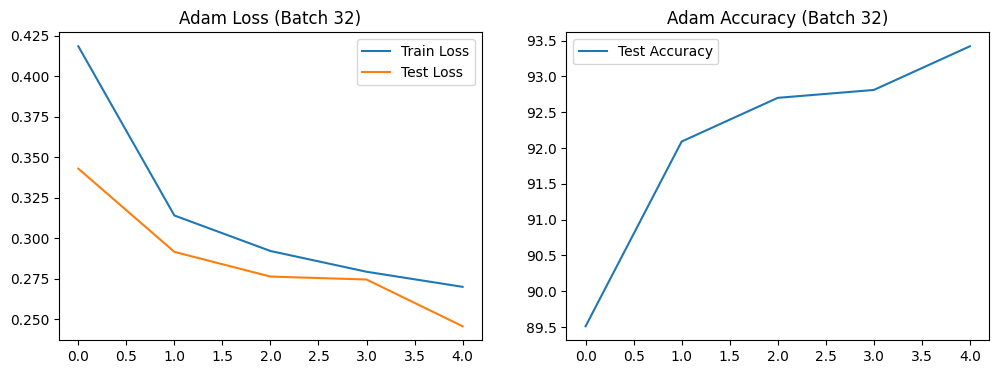

Training with RMSprop, batch size: 32
Epoch 1: Train Loss: 0.8667, Test Loss: 0.3086, Accuracy: 91.65%
Epoch 2: Train Loss: 0.3720, Test Loss: 0.3463, Accuracy: 90.87%
Epoch 3: Train Loss: 0.3527, Test Loss: 0.3629, Accuracy: 90.37%
Epoch 4: Train Loss: 0.3299, Test Loss: 0.2868, Accuracy: 92.71%
Epoch 5: Train Loss: 0.3259, Test Loss: 0.3016, Accuracy: 92.91%


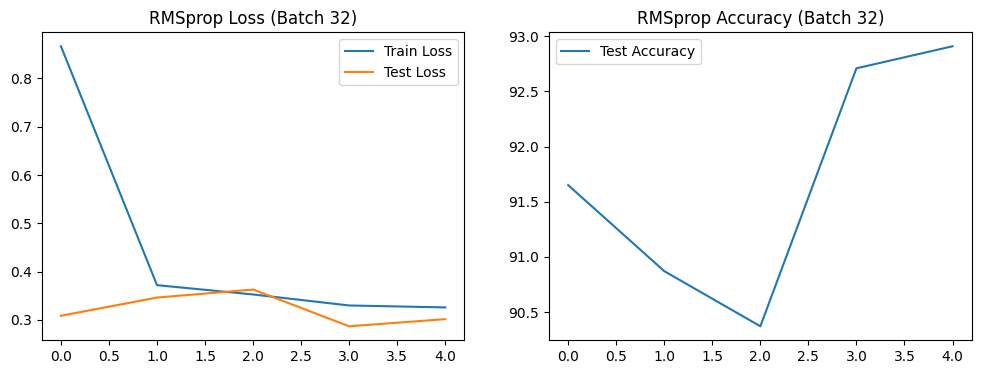

Training with Momentum, batch size: 32
Epoch 1: Train Loss: 0.3440, Test Loss: 0.2203, Accuracy: 93.30%
Epoch 2: Train Loss: 0.1570, Test Loss: 0.1202, Accuracy: 96.34%
Epoch 3: Train Loss: 0.1195, Test Loss: 0.1135, Accuracy: 96.52%
Epoch 4: Train Loss: 0.0994, Test Loss: 0.0962, Accuracy: 97.17%
Epoch 5: Train Loss: 0.0827, Test Loss: 0.0936, Accuracy: 97.21%


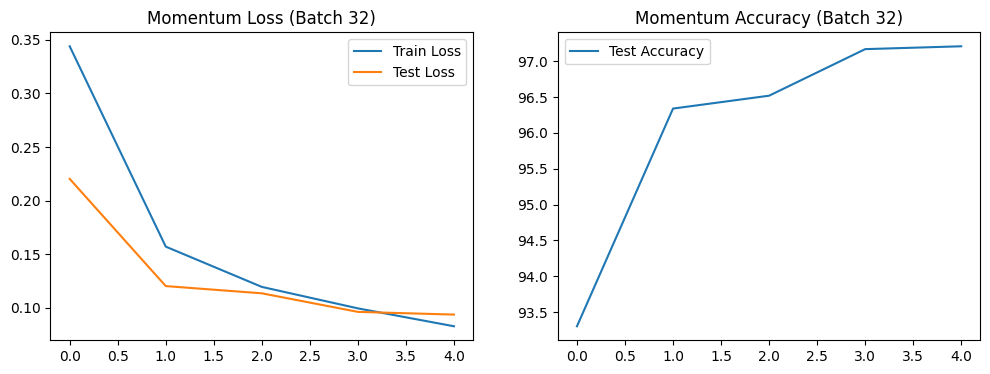

Training with SGD, batch size: 64
Epoch 1: Train Loss: 1.0271, Test Loss: 0.4430, Accuracy: 87.57%
Epoch 2: Train Loss: 0.3795, Test Loss: 0.3237, Accuracy: 90.43%
Epoch 3: Train Loss: 0.3185, Test Loss: 0.2904, Accuracy: 91.78%
Epoch 4: Train Loss: 0.2847, Test Loss: 0.2716, Accuracy: 92.20%
Epoch 5: Train Loss: 0.2597, Test Loss: 0.2400, Accuracy: 92.91%


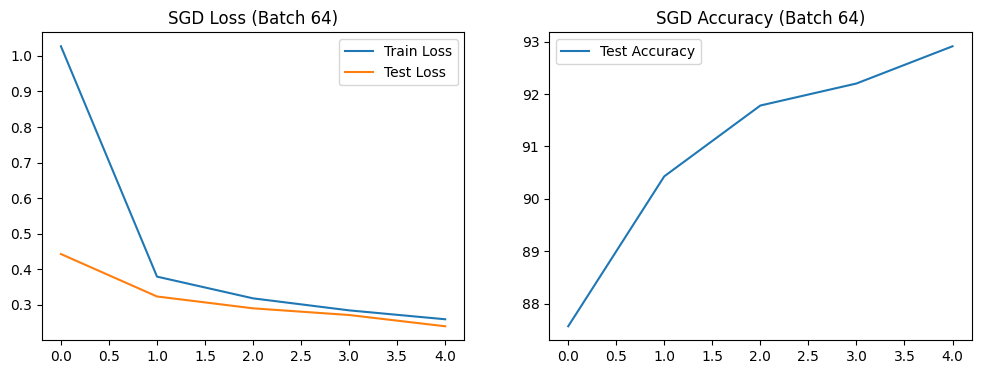

Training with Adam, batch size: 64
Epoch 1: Train Loss: 0.3785, Test Loss: 0.2742, Accuracy: 91.80%
Epoch 2: Train Loss: 0.2572, Test Loss: 0.2428, Accuracy: 92.80%
Epoch 3: Train Loss: 0.2445, Test Loss: 0.2209, Accuracy: 93.98%
Epoch 4: Train Loss: 0.2286, Test Loss: 0.2777, Accuracy: 92.32%
Epoch 5: Train Loss: 0.2150, Test Loss: 0.2246, Accuracy: 94.21%


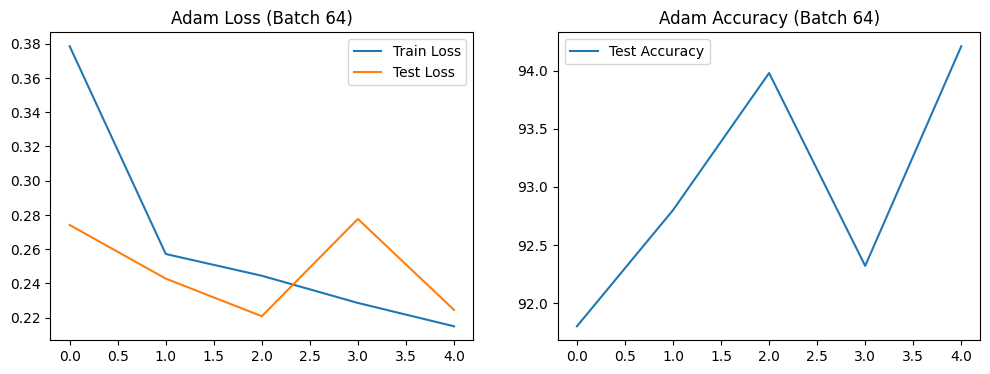

Training with RMSprop, batch size: 64
Epoch 1: Train Loss: 1.1538, Test Loss: 0.3401, Accuracy: 89.52%
Epoch 2: Train Loss: 0.3420, Test Loss: 0.2828, Accuracy: 91.74%
Epoch 3: Train Loss: 0.3015, Test Loss: 0.5681, Accuracy: 86.46%
Epoch 4: Train Loss: 0.2776, Test Loss: 0.4124, Accuracy: 87.74%
Epoch 5: Train Loss: 0.2715, Test Loss: 0.2511, Accuracy: 93.46%


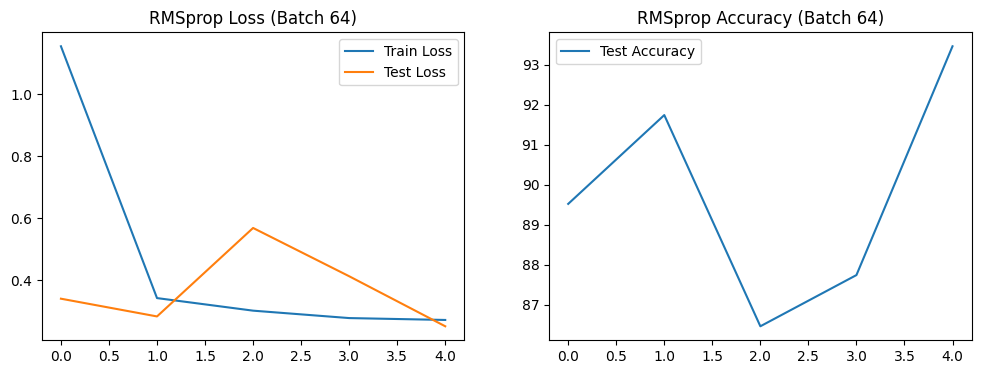

Training with Momentum, batch size: 64
Epoch 1: Train Loss: 0.4463, Test Loss: 0.1991, Accuracy: 94.09%
Epoch 2: Train Loss: 0.1823, Test Loss: 0.1715, Accuracy: 94.38%
Epoch 3: Train Loss: 0.1302, Test Loss: 0.1111, Accuracy: 96.45%
Epoch 4: Train Loss: 0.1022, Test Loss: 0.0962, Accuracy: 97.07%
Epoch 5: Train Loss: 0.0904, Test Loss: 0.0919, Accuracy: 97.04%


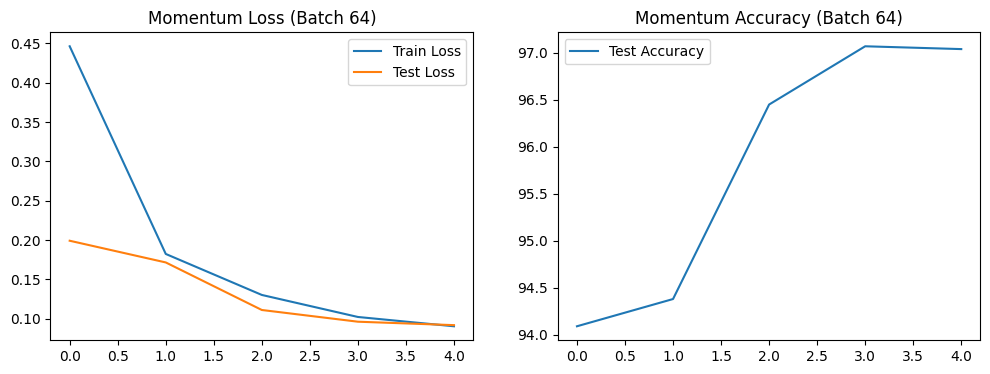

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

def load_data(batch_size):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_model(optimizer, train_loader, test_loader, criterion, num_epochs=5):
    model = NeuralNetwork()
    optimizer = optimizer(model.parameters())

    train_losses, test_losses, test_accuracies = [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))

        model.eval()
        correct = 0
        total = 0
        test_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        test_losses.append(test_loss / len(test_loader))
        test_accuracies.append(100 * correct / total)

        print(f'Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {test_accuracies[-1]:.2f}%')

    return train_losses, test_losses, test_accuracies

optimizers = {
    "SGD": lambda params: optim.SGD(params, lr=0.01),
    "Adam": lambda params: optim.Adam(params, lr=0.01),
    "RMSprop": lambda params: optim.RMSprop(params, lr=0.01),
    "Momentum": lambda params: optim.SGD(params, lr=0.01, momentum=0.9)
}

batch_sizes = [16, 32, 64]
learning_rates = [0.01, 0.1, 0.001]
criterion = nn.CrossEntropyLoss()

for batch_size in batch_sizes:
    train_loader, test_loader = load_data(batch_size)
    for opt_name, opt_func in optimizers.items():
        print(f"Training with {opt_name}, batch size: {batch_size}")
        train_losses, test_losses, test_accuracies = train_model(opt_func, train_loader, test_loader, criterion)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train Loss')
        plt.plot(test_losses, label='Test Loss')
        plt.title(f'{opt_name} Loss (Batch {batch_size})')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(test_accuracies, label='Test Accuracy')
        plt.title(f'{opt_name} Accuracy (Batch {batch_size})')
        plt.legend()

        plt.show()
